# Demo_Hough_Lines




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, March 24, 2022 at 02:06 PM.</small></i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def houghLine(image):
    ''' Basic Hough line transform that builds the accumulator array
    Input : image : edge image (canny)
    Output : accumulator : the accumulator of hough space
             thetas : values of theta (-90 : 90)
             rs : values of radius (-max distance : max distance)
    Reference: https://sbme-tutorials.github.io/2018/cv/notes/5_week5.html
    '''

    # Get image dimensions
    # y for rows and x for columns 
    Ny = image.shape[0]
    Nx = image.shape[1]

    # Max diatance is diagonal one 
    Maxdist = int(np.round(np.sqrt(Nx**2 + Ny ** 2)))


    # Theta in range from -90 to 90 degrees
    thetas = np.deg2rad(np.arange(-90, 90))
    # Range of radius
    rs = np.linspace(-Maxdist, Maxdist, 2*Maxdist)

    accumulator = np.zeros((2 * Maxdist, len(thetas)))

    # Loop all points of the image
    for y in range(Ny):
      for x in range(Nx):
         # Check if it is an edge pixel
         #  NB: y -> rows , x -> columns
         if image[y,x] > 0:
           # Map edge pixel to hough space
           for k in range(len(thetas)):
              # Calculate space parameter
              r = x*np.cos(thetas[k]) + y * np.sin(thetas[k])

              # Update the accumulator
              # N.B: r has value -max to max
              # map r to its idx 0 : 2*max
              accumulator[int(r) + Maxdist,k] += 1

    return accumulator, thetas, rs

Input image

In [2]:
image = np.zeros((150,150))

Add points, start with one point

In [3]:
image[75, 75] = 1

Do Hough Transform

In [4]:
accumulator, thetas, rhos = houghLine(image)

Plotting

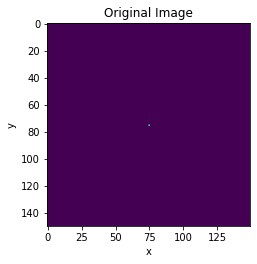

In [5]:
plt.figure('Hough Transform', figsize=(8,8))
plt.tight_layout()

plt.subplot(1,2,1)
plt.title('Original Image')
plt.xlabel("x")
plt.ylabel("y")
plt.imshow(image)

lt.set_cmap('gray')

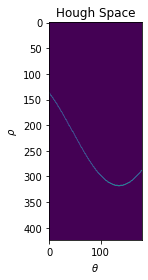

In [6]:
plt.subplot(1,2,2)
plt.title('Hough Space')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho$')
plt.imshow(accumulator)

lt.set_cmap('gray')

In [7]:
plt.show()

plt.savefig('demo_hough_transform_lines_1.png')

<Figure size 432x288 with 0 Axes>

Add more points

In [8]:
image[50, 100] = 1
image[100, 50] = 1

Do Hough Transform

In [9]:
accumulator, thetas, rhos = houghLine(image)

Plotting

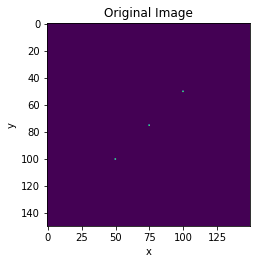

In [10]:
plt.figure('Hough Transform', figsize=(8,8))
plt.tight_layout()

plt.subplot(1,2,1)
plt.title('Original Image')
plt.xlabel("x")
plt.ylabel("y")
plt.imshow(image)

lt.set_cmap('gray')

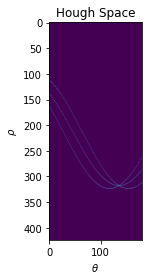

In [11]:
plt.subplot(1,2,2)
plt.title('Hough Space')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho$')
plt.imshow(accumulator)

lt.set_cmap('gray')

In [12]:
plt.show()

plt.savefig('demo_hough_transform_lines_2.png')

plt.close()

Draw all canvases 

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

ldd: exited with unknown exit code (134)


Welcome to JupyROOT 6.26/00
